In [9]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets, neighbors
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)


In [ ]:
datasets.

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

In [3]:
classifier1 = svm.SVC(kernel='linear', probability=True)
probas_1 = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas_1[0:10]

classifier2 = neighbors.KNeighborsClassifier(n_neighbors=3)
probas_2 = classifier2.fit(X_train, y_train).predict_proba(X_test)

classifier3 = neighbors.KNeighborsClassifier(n_neighbors=21)
probas_3 = classifier3.fit(X_train, y_train).predict_proba(X_test)

In [4]:
probas_2[0:10]

array([[ 0.66666667,  0.33333333],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.33333333,  0.66666667],
       [ 0.33333333,  0.66666667],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333],
       [ 0.        ,  1.        ],
       [ 0.66666667,  0.33333333],
       [ 0.33333333,  0.66666667]])

In [5]:
# Compute ROC curve and area the curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas_1[:, 1])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, probas_2[:, 1])
roc_auc2 = auc(fpr2, tpr2)


fpr3, tpr3, thresholds3 = roc_curve(y_test, probas_3[:, 1])
roc_auc3 = auc(fpr3, tpr3)

print "Area under the ROC curves (AUC): SVC={0} KNN(3)={1} KNN(21)={2}".format(
    roc_auc1, roc_auc2, roc_auc3)

Area under the ROC curves (AUC): SVC=0.793880837359 KNN(3)=0.680354267311 KNN(21)=0.773752012882


In [6]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0])

In [7]:
%matplotlib inline

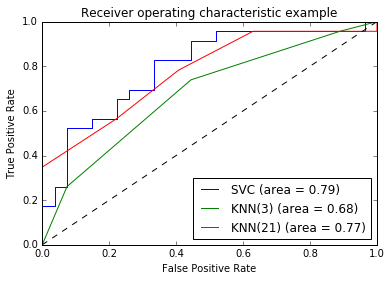

In [8]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='SVC (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='KNN(3) (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='KNN(21) (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()